In [9]:
import covasim as cv
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
sys.path.append('../..') 
from tti_models.infectiousness_profiles import FerrettiInfectionDynamics
from tti_models.analyzers.alternative_fit import FitGrowthRate
sns.set()

It takes a little bit of fidling to be able to get covasim to calibrate to a growth rate, instead of calibrating to data. The estimation process has a few hyperparameters that need to be set.

In [189]:
def run_simulation(beta: float, starting_infections: int, day_from: int, day_to: int):

    # we use a custom infectiousness profiles
    ferretti_infectiousness = FerrettiInfectionDynamics()

    # create simulation parameter dictionary
    pars = dict(
        start_day       = '2020-02-01',
        end_day         = '2020-05-01',
        beta            = beta, # from calibration
        pop_size        = 1e5,
        infection_dynamics = ferretti_infectiousness,
        verbose         = 0,
        pop_infected    = starting_infections,
        rand_seed       = None
    )

    sim = cv.Sim(pars)
    sim.run()

    # pass to the objective function to evaluate the mismatch
    fit_analyzer = FitGrowthRate(sim, growth_rate=0.0)
    fit_analyzer.estimate_growth_rate(day_from=day_from, day_to=day_to)

    return fit_analyzer

In [190]:
output = run_simulation(beta=0.13, starting_infections=50, day_from=10, day_to=90)

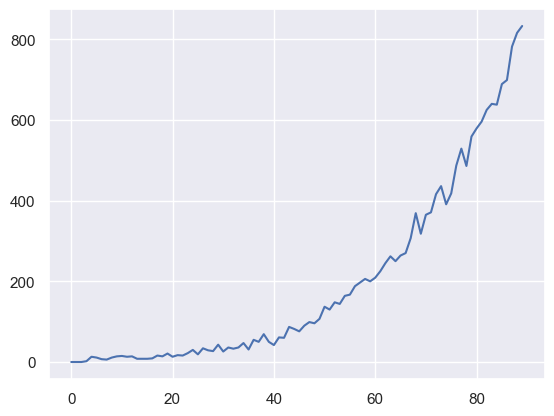

In [191]:
cases = output.get_cases(day_from=0, day_to=90)
sns.lineplot(x = range(len(cases)), y = cases)
plt.show()

<ipython-input-192-b17f190064bd>:1: RuntimeWarning: divide by zero encountered in log
  sns.lineplot(x = range(len(cases)), y = np.log(cases))


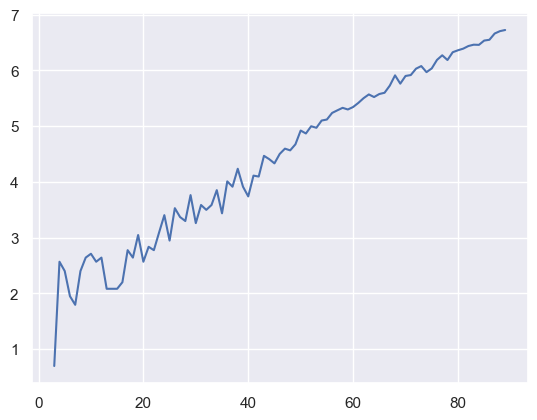

In [192]:
sns.lineplot(x = range(len(cases)), y = np.log(cases))
plt.show()

In [193]:
output.estimate_growth_rate(day_from=20, day_to=50)
output.estimated_growth_rate

0.059878806394336515

In [ ]:
# in this example, we achieve a growth rate 

For each growth rate we want to calibrate the model to, we need to find a lower and upper bound.

We also need to find an appropiate number of starting infections. If you are trying to estimate a positive growth rate, then the number of starting infections should be small. If you are trying to estimate a negative growth rate, then the number of starting infections should be higher, but not too high, else susceptible depletion kicks in.